# A plot of regions in the dataset

In [22]:
!pip install contextily geopandas --quiet
import pandas as pd
import geopandas as gpd
import os
import contextily as cx

In [23]:
data_root = "/ssd/floatingObjects/data"

In [24]:
shapefiles = [f for f in os.listdir(data_root) if f.endswith(".shp")]

In [25]:
lines = []
for shp in shapefiles:
    gdf = gpd.read_file(os.path.join(data_root, shp))
    gdf["shapefile"] = shp
    lines.append(gdf)
lines = pd.concat(lines)

In [26]:
locations = lines.groupby("shapefile").first()
locations["count"] = lines.groupby("shapefile").count()["geometry"]
locations = locations.reset_index().set_crs(4326)
locations["site"] = locations["shapefile"].apply(lambda shp: shp.replace(".shp","").replace("-","_"))
locations = locations.set_index("site")
locations["geometry"] = locations.geometry.centroid


<ipython-input-26-31d7faa094de>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  locations["geometry"] = locations.geometry.centroid


No handles with labels found to put in legend.


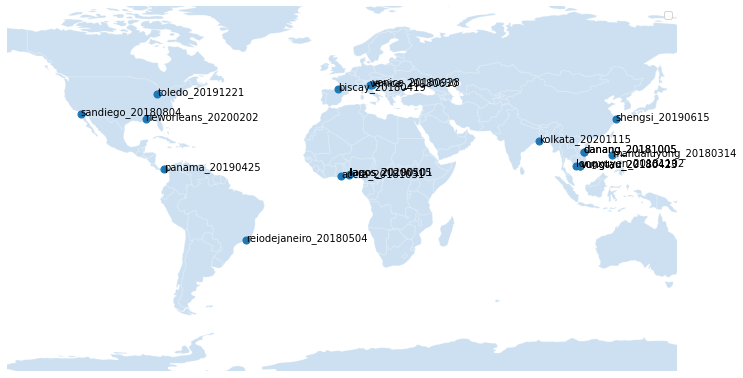

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, facecolor="#0065bd", alpha=0.2, edgecolor='w')

locations.reset_index().to_crs(4326).plot(ax=ax, markersize=50)
for idx, row in locations.iterrows():
    ax.text(row.geometry.x,row.geometry.y,row.name)
ax.set_xlim(-150,150)
ax.set_ylim(-80,80)

#cx.add_basemap(ax, crs=4326)
ax.set_axis_off()
plt.legend()
fig.savefig("map.svg")

In [40]:
locations.index

Index(['accra_20181031', 'biscay_20180419', 'danang_20181005',
       'danang_20181005', 'kolkata_20201115', 'lagos_20190101',
       'lagos_20200505', 'longxuyen_20181102', 'mandaluyong_20180314',
       'neworleans_20200202', 'panama_20190425', 'reiodejaneiro_20180504',
       'sandiego_20180804', 'shengsi_20190615', 'toledo_20191221',
       'venice_20180630', 'venice_20180928', 'vungtau_20180423',
       'vungtau_20180423'],
      dtype='object', name='site')